# Complete Notebook

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications import Xception
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

## Initializing Parameters

In [3]:
IMAGE_SIZE = [256, 256, 3]

train_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train'
test_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test'
val_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val'

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


## Xception

In [5]:
base_model_xcep = Xception(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

83689472/83683744 [==============================] - 1s 0us/step


In [6]:
for layer in base_model_xcep.layers:
    layer.trainable = False

## Building Model

In [7]:
x = base_model_xcep.output
x = Flatten()(x)

# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# prediction = Dense(2,activation = "sigmoid")(x)
# model_final = Model(base_model_eff0.input,prediction)

prediction = Dense(2, activation='softmax')(x)
final_model = Model(inputs=base_model_xcep.input, outputs=prediction)

In [8]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

In [9]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

## Training

In [10]:
history = final_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
114/114 [==============================] - 250s 2s/step - loss: 0.3924 - accuracy: 0.9196 - val_loss: 0.0631 - val_accuracy: 0.9802
Epoch 2/100
114/114 [==============================] - 161s 1s/step - loss: 0.0582 - accuracy: 0.9820 - val_loss: 0.0498 - val_accuracy: 0.9846
Epoch 3/100
114/114 [==============================] - 161s 1s/step - loss: 0.0486 - accuracy: 0.9836 - val_loss: 0.0585 - val_accuracy: 0.9802
Epoch 4/100
114/114 [==============================] - 160s 1s/step - loss: 0.0506 - accuracy: 0.9827 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 5/100
114/114 [==============================] - 161s 1s/step - loss: 0.0384 - accuracy: 0.9828 - val_loss: 0.0521 - val_accuracy: 0.9824
Epoch 6/100
114/114 [==============================] - 161s 1s/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0460 - val_accuracy: 0.9868
Epoch 7/100
114/114 [==============================] - 161s 1s/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0427 - val_accuracy:

## Testing

In [11]:
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 36s 2s/step - loss: 0.0203 - accuracy: 0.9890
test loss, test acc: [0.020335832610726357, 0.9890109896659851]


## Plotting 

In [12]:
history.history

{'loss': [0.14872893691062927,
  0.056235648691654205,
  0.051866963505744934,
  0.047507643699645996,
  0.04305323213338852,
  0.03927081078290939,
  0.036663588136434555,
  0.03360197693109512,
  0.034008681774139404,
  0.03630109876394272,
  0.03330625593662262,
  0.029511187225580215,
  0.03085407055914402,
  0.03285885602235794,
  0.026236407458782196,
  0.030899440869688988,
  0.02575921267271042,
  0.02894369326531887,
  0.025644758716225624,
  0.0324474461376667,
  0.024880290031433105,
  0.02403326705098152,
  0.027697885408997536,
  0.02257678098976612,
  0.023328319191932678,
  0.026783820241689682,
  0.022109249606728554,
  0.022366834804415703,
  0.021457044407725334,
  0.022732427343726158,
  0.020234977826476097,
  0.02072186768054962,
  0.020524349063634872,
  0.021484868600964546,
  0.01833016611635685,
  0.020994439721107483,
  0.020466869696974754,
  0.023989669978618622,
  0.019725503399968147,
  0.021984759718179703,
  0.01886545680463314,
  0.020156290382146835,
 

### Accuracy vs Epochs

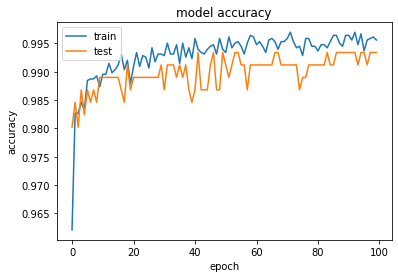

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Loss vs Epochs

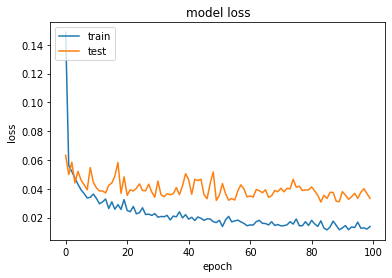

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()